In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("Loan_Delinquent_Dataset.csv")
loan = data.copy()

In [3]:
loan.head()

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,1,36 months,Female,House,Mortgage,>25,300-500
1,2,0,36 months,Female,House,Rent,20-25,>500
2,3,1,36 months,Female,House,Rent,>25,300-500
3,4,1,36 months,Female,Car,Mortgage,>25,300-500
4,5,1,36 months,Female,House,Rent,>25,300-500


In [4]:
loan.tail()

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
11543,11544,0,60 months,Male,other,Mortgage,>25,300-500
11544,11545,1,36 months,Male,House,Rent,20-25,300-500
11545,11546,0,36 months,Female,Personal,Mortgage,20-25,>500
11546,11547,1,36 months,Female,House,Rent,20-25,300-500
11547,11548,1,36 months,Male,Personal,Mortgage,20-25,300-500


In [6]:
loan.shape

(11548, 8)

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 8 columns):
ID                11548 non-null int64
isDelinquent      11548 non-null int64
term              11548 non-null object
gender            11548 non-null object
purpose           11548 non-null object
home_ownership    11548 non-null object
age               11548 non-null object
FICO              11548 non-null object
dtypes: int64(2), object(6)
memory usage: 721.8+ KB


In [10]:
loan["term"] = loan["term"].astype("category")
loan["gender"] = loan["gender"].astype("category")
loan["purpose"] = loan["purpose"].astype("category")
loan["home_ownership"] = loan["home_ownership"].astype("category")
loan["age"] = loan["age"].astype("category")
loan["FICO"] = loan["FICO"].astype("category")
loan["isDelinquent"] = loan["isDelinquent"].astype("category")

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 8 columns):
ID                11548 non-null int64
isDelinquent      11548 non-null category
term              11548 non-null category
gender            11548 non-null category
purpose           11548 non-null category
home_ownership    11548 non-null category
age               11548 non-null category
FICO              11548 non-null category
dtypes: category(7), int64(1)
memory usage: 170.2 KB


In [12]:
loan.describe(include="all")

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
count,11548.000000,11548.0,11548,11548,11548,11548,11548,11548
unique,NaN,2.0,2,2,7,3,2,2
top,NaN,1.0,36 months,Male,House,Mortgage,20-25,300-500
freq,NaN,7721.0,10589,6555,6892,5461,5888,6370
mean,5774.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3333.764789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2887.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5774.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8661.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
loan["ID"].nunique()

11548

In [14]:
loan.drop(["ID"], axis=1, inplace=True)

In [15]:
loan.isnull().sum()

isDelinquent      0
term              0
gender            0
purpose           0
home_ownership    0
age               0
FICO              0
dtype: int64

In [31]:
def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [40]:
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, loan["isDelinquent"], margins=True)
    print(tab1)
    print("-" * 60)
    tab = pd.crosstab(x, loan["isDelinquent"], normalize = "index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.show()

In [47]:
def stacked_plot_FICO(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, loan["FICO"], margins=True)
    print(tab1)
    print("-" * 50)
    tab = pd.crosstab(x, loan["FICO"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.show()

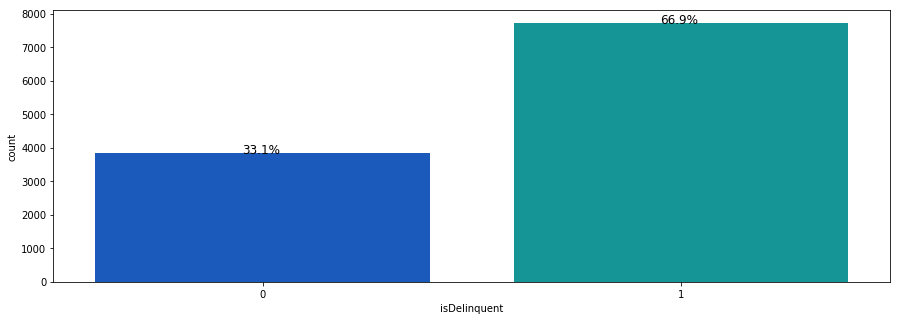

In [33]:
plt.figure(figsize = (15, 5))
ax = sns.countplot(loan["isDelinquent"], palette="winter")
perc_on_bar(ax, loan["term"])

ValueError: Format specifier missing precision

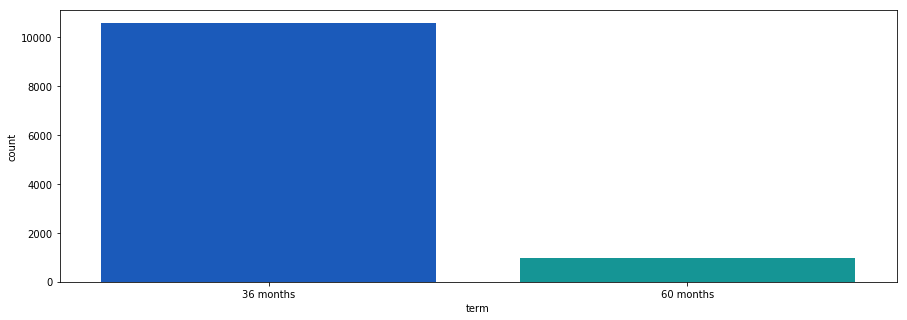

In [18]:
plt.figure(figsize = (15, 5))
ax = sns.countplot(loan["term"], palette = "winter")
perc_on_bar(ax, loan["term"])

ValueError: Format specifier missing precision

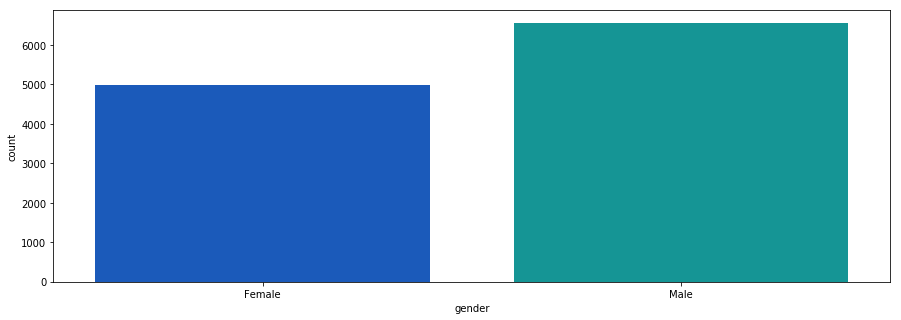

In [19]:
plt.figure(figsize = (15, 5))
ax = sns.countplot(loan["gender"], palette = "winter")
perc_on_bar(ax, loan["gender"])

ValueError: Format specifier missing precision

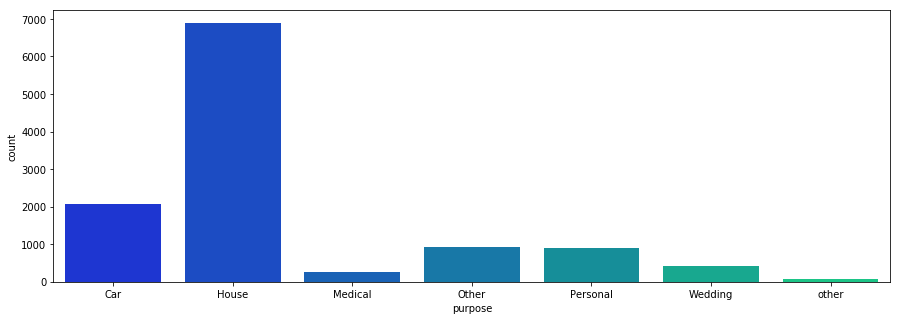

In [20]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(loan["purpose"], palette = "winter")
perc_on_bar(ax, loan["purpose"])

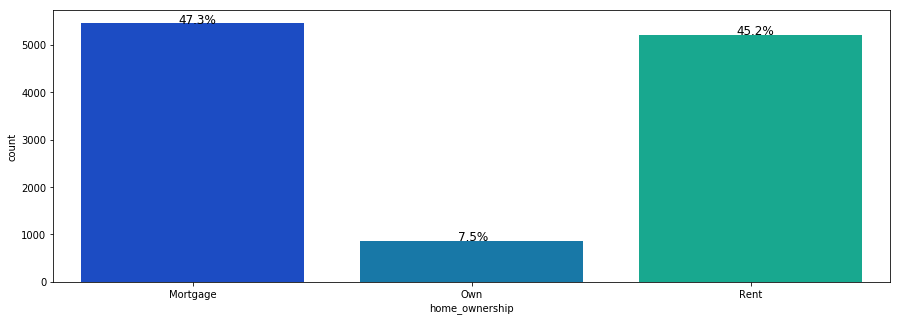

In [34]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(loan["home_ownership"], palette = "winter")
perc_on_bar(ax, loan["home_ownership"])

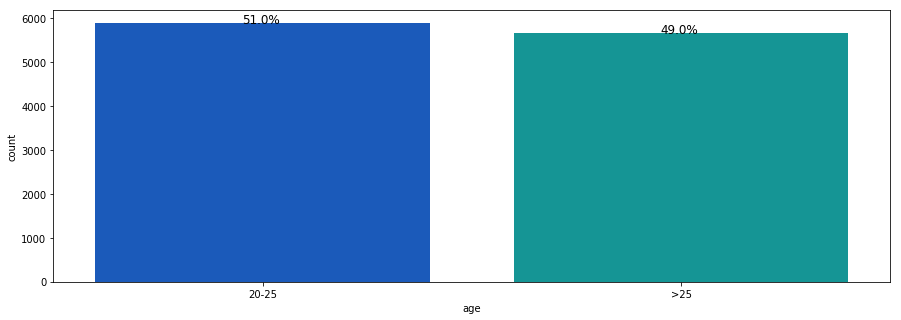

In [35]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(loan["age"], palette = "winter")
perc_on_bar(ax, loan["age"])

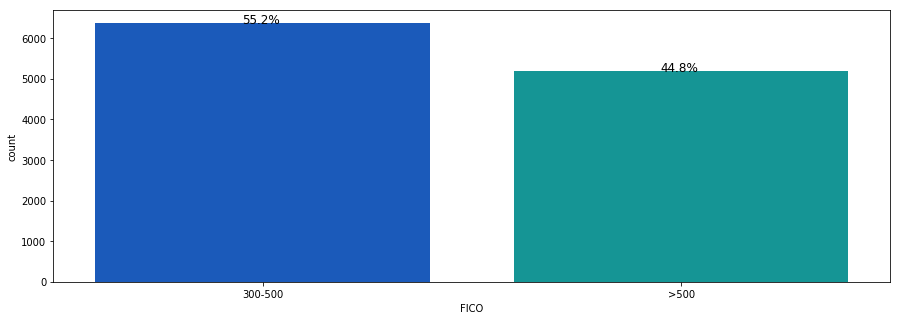

In [36]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(loan["FICO"], palette = "winter")
perc_on_bar(ax, loan["FICO"])

In [37]:
loan["purpose"].unique()

[House, Car, Other, Personal, Wedding, Medical, other]
Categories (7, object): [House, Car, Other, Personal, Wedding, Medical, other]

In [39]:
loan["purpose"].replace("other", "Other", inplace=True)
loan["purpose"].unique()

[House, Car, Other, Personal, Wedding, Medical]
Categories (6, object): [House, Car, Other, Personal, Wedding, Medical]

isDelinquent     0     1    All
term                           
36 months     3168  7421  10589
60 months      659   300    959
All           3827  7721  11548
------------------------------------------------------------


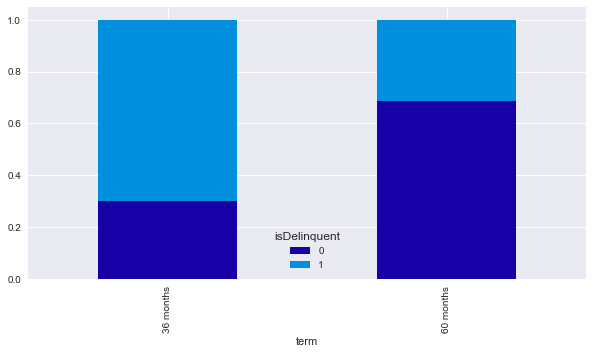

In [41]:
stacked_plot(loan["term"])

isDelinquent     0     1    All
gender                         
Female        1850  3143   4993
Male          1977  4578   6555
All           3827  7721  11548
------------------------------------------------------------


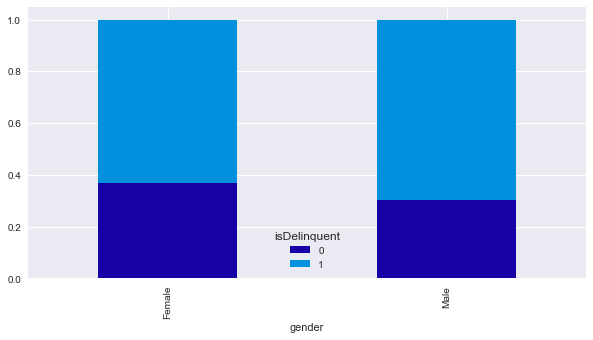

In [42]:
stacked_plot(loan["gender"])

isDelinquent     0     1      All
purpose                          
Car            678  1402   2080.0
House         2272  4620   6892.0
Medical        107   159    266.0
Other          357   653   1010.0
Personal       274   618    892.0
Wedding        139   269    408.0
other            0     0      NaN
All           3827  7721  11548.0
------------------------------------------------------------


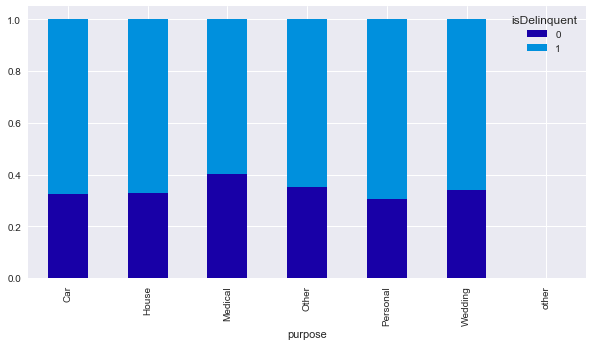

In [43]:
stacked_plot(loan["purpose"])

isDelinquent       0     1    All
home_ownership                   
Mortgage        1831  3630   5461
Own              259   612    871
Rent            1737  3479   5216
All             3827  7721  11548
------------------------------------------------------------


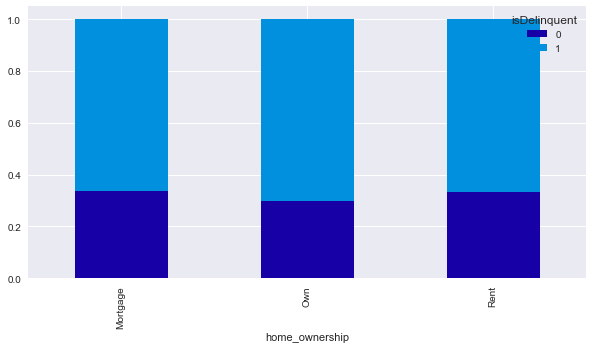

In [44]:
stacked_plot(loan["home_ownership"])

isDelinquent     0     1    All
age                            
20-25         1858  4030   5888
>25           1969  3691   5660
All           3827  7721  11548
------------------------------------------------------------


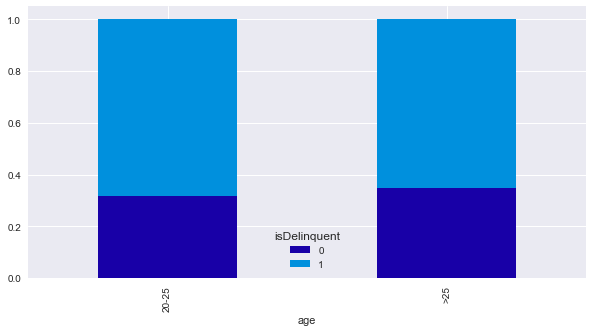

In [45]:
stacked_plot(loan["age"])

isDelinquent     0     1    All
FICO                           
300-500        941  5429   6370
>500          2886  2292   5178
All           3827  7721  11548
------------------------------------------------------------


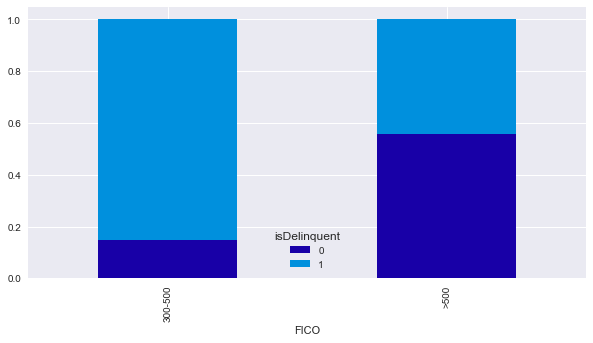

In [46]:
stacked_plot(loan["FICO"])

FICO            300-500  >500    All
home_ownership                      
Mortgage           2857  2604   5461
Own                 480   391    871
Rent               3033  2183   5216
All                6370  5178  11548
--------------------------------------------------


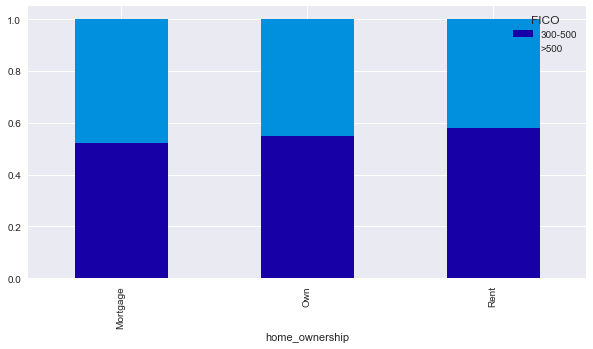

In [48]:
stacked_plot_FICO(loan["home_ownership"])

FICO   300-500  >500    All
age                        
20-25     3927  1961   5888
>25       2443  3217   5660
All       6370  5178  11548
--------------------------------------------------


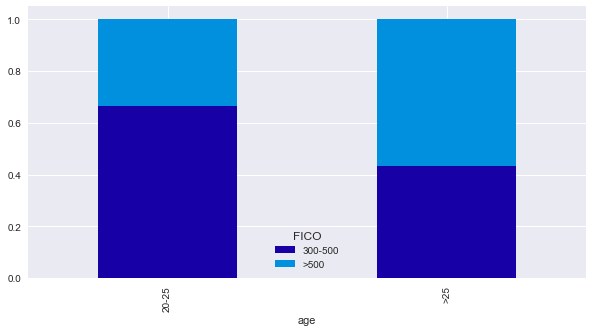

In [49]:
stacked_plot_FICO(loan["age"])

FICO    300-500  >500    All
gender                      
Female     2665  2328   4993
Male       3705  2850   6555
All        6370  5178  11548
--------------------------------------------------


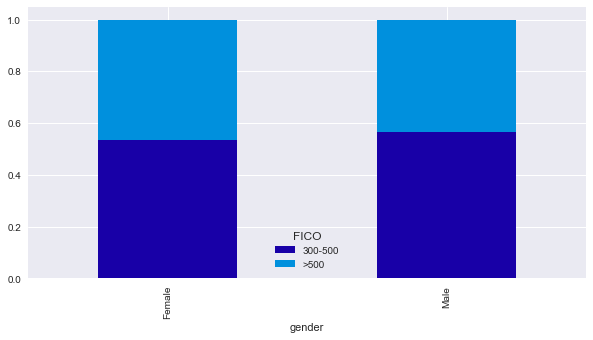

In [50]:
stacked_plot_FICO(loan["gender"])

In [52]:
crosstab = pd.crosstab(loan["FICO"], loan["home_ownership"])

Ho = "FICO score has no effect on home ownership"
Ha = "FICO score has an effect on home ownership"

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

FICO score has an effect on home ownership as the p_value (0.0) < 0.05


In [53]:
crosstab = pd.crosstab(loan["FICO"], loan["gender"])
Ho = "FICO score has no effect on gender"
Ha = "FICO score has an effect on gender"

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

FICO score has an effect on gender as the p_value (0.001) < 0.05


In [54]:
crosstab = pd.crosstab(loan["FICO"], loan["age"])

Ho = "FICO score has no effect on age"
Ha = "FICO score has an effect on age"

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

FICO score has an effect on age as the p_value (0.0) < 0.05


In [55]:
x = loan.drop(["isDelinquent"], axis = 1)
y = loan["isDelinquent"]

In [56]:
x = pd.get_dummies(x, drop_first = True)
x.head()

,term_60 months,gender_Male,purpose_House,purpose_Medical,purpose_Other,purpose_Personal,purpose_Wedding,purpose_other,home_ownership_Own,home_ownership_Rent,age_>25,FICO_>500
0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,1,0


In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.4, random_state=1)

In [58]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(6928, 12)
(4620, 12)
(6928,)
(4620,)


In [61]:
y.value_counts()

1    7721
0    3827
Name: isDelinquent, dtype: int64

In [63]:
model = DecisionTreeClassifier(criterion = "gini", random_state = 1)
model.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [64]:
print("Accuracy on train set:", model.score(xtrain, ytrain))
print("Accuracy on test set:", model.score(xtest, ytest))

Accuracy on train set: 0.855513856812933
Accuracy on test set: 0.8437229437229438


In [66]:
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model: classifier to predict values of X
    y_actual: ground truth
    """
    y_predict = model.predict(xtest)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = ["Actual - No", "Actual - Yes"],
                columns = ["Predicted - No", "Predicted - Yes"])
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize = (10, 7))
    sns.heatmap(df_cm, annot = labels, fmt = "")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

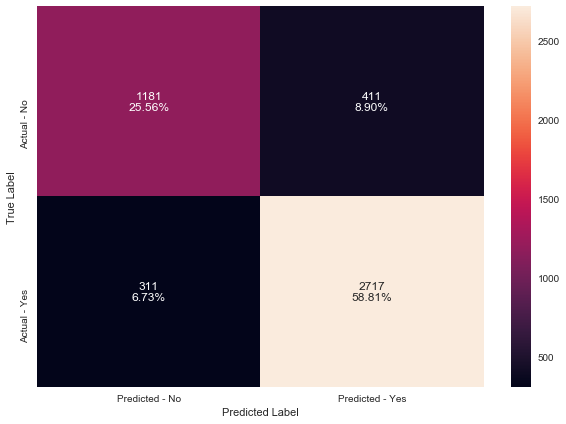

In [67]:
make_confusion_matrix(model, ytest)

In [68]:
def get_recall_score(model):
    """
    model: classifier to predict values of X
    """
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)
    print("Recall on training set:", metrics.recall_score(ytrain, pred_train))
    print("Recall on test set:", metrics.recall_score(ytest, pred_test))

In [69]:
get_recall_score(model)

Recall on training set: 0.908800340933305
Recall on test set: 0.8972919418758256


In [71]:
column_names = list(x.columns)
feature_names = column_names
print(feature_names)

['term_60 months', 'gender_Male', 'purpose_House', 'purpose_Medical', 'purpose_Other', 'purpose_Personal', 'purpose_Wedding', 'purpose_other', 'home_ownership_Own', 'home_ownership_Rent', 'age_>25', 'FICO_>500']


In [73]:
plt.figure(figsize = (20, 30))

out = tree.plot_tree(model, feature_names = feature_names, filled = True, fontsize = 9, node_ids = True, class_names = True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

In [74]:
print(tree.export_text(model,feature_names=feature_names,show_weights=True))

AttributeError: module 'sklearn.tree' has no attribute 'export_text'

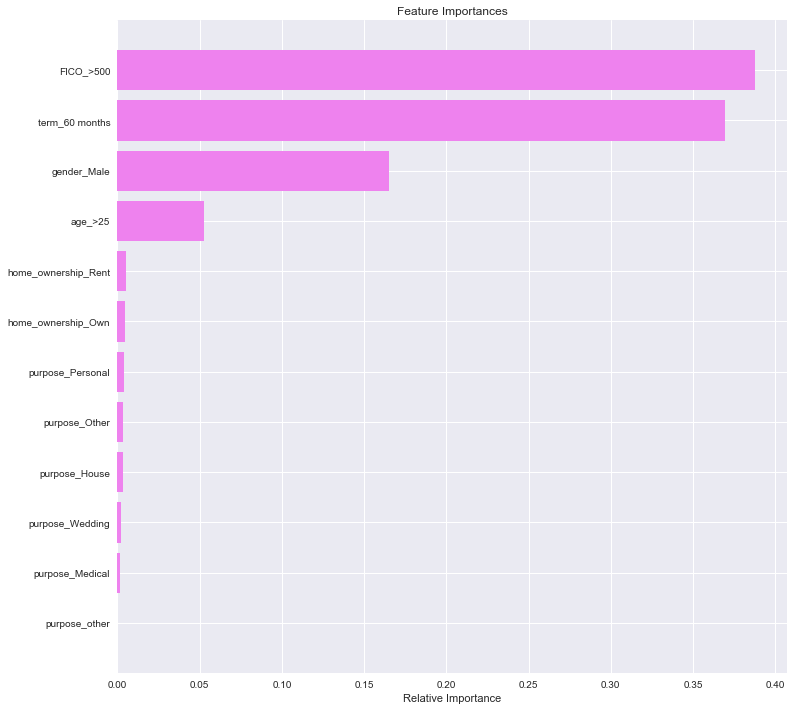

In [75]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [77]:
estimator = DecisionTreeClassifier(random_state = 1)

parameters = {"max_depth": np.arange(1, 10),
              "min_samples_leaf": [1, 2, 5, 7, 10, 15, 20],
              "min_leaf_nodes": [5, 10, 15, 20, 25, 30],
              "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1]
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(estimator, parameters, scoring = acc_scorer, cv = 5)
grid_obj = grid_obj.fit(xtrain, ytrain)

estimator = grid_obj.best_estimator_

estimator.fit(xtrain, ytrain)

ValueError: Invalid parameter min_leaf_nodes for estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0001, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'). Check the list of available parameters with `estimator.get_params().keys()`.

In [78]:
make_confusion_matrix(estimator, ytest)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [79]:
get_recall_score(estimator)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [80]:
column_names = list(x.columns)
feature_names = column_names
print(feature_names)

['term_60 months', 'gender_Male', 'purpose_House', 'purpose_Medical', 'purpose_Other', 'purpose_Personal', 'purpose_Wedding', 'purpose_other', 'home_ownership_Own', 'home_ownership_Rent', 'age_>25', 'FICO_>500']


In [81]:
plt.figure(figsize = (5, 5))

tree.plot_tree(estimator, feature_names = feature_names, filled = True, fontsize = 9, node_ids = True, class_names = True)
plt.show()

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

In [82]:
clf = DecisionTreeClassifier(random_state = 1)
path = clf.cost_complexity_pruning_path(xtrain, ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

AttributeError: 'DecisionTreeClassifier' object has no attribute 'cost_complexity_pruning_path'

In [83]:
pd.DataFrame(path)

NameError: name 'path' is not defined

NameError: name 'ccp_alphas' is not defined

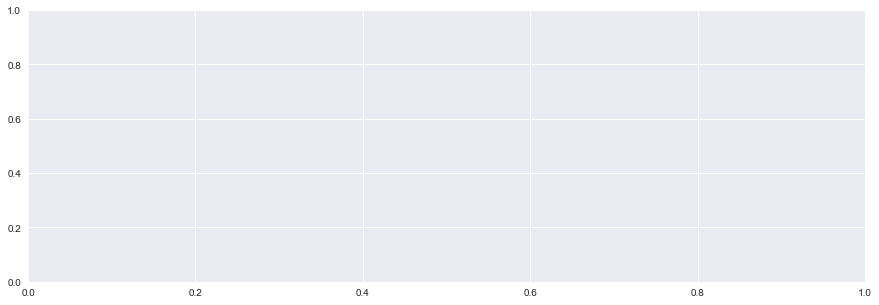

In [84]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [85]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 1, ccp_alpha = ccp_alpha)
    clf.fit(xtrain, ytrain)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

NameError: name 'ccp_alphas' is not defined

In [86]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

NameError: name 'ccp_alphas' is not defined

In [87]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(xtrain)
    values_train=metrics.recall_score(ytrain,pred_train3)
    recall_train.append(values_train)

In [88]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(xtest)
    values_test=metrics.recall_score(ytest,pred_test3)
    recall_test.append(values_test)

NameError: name 'ay' is not defined

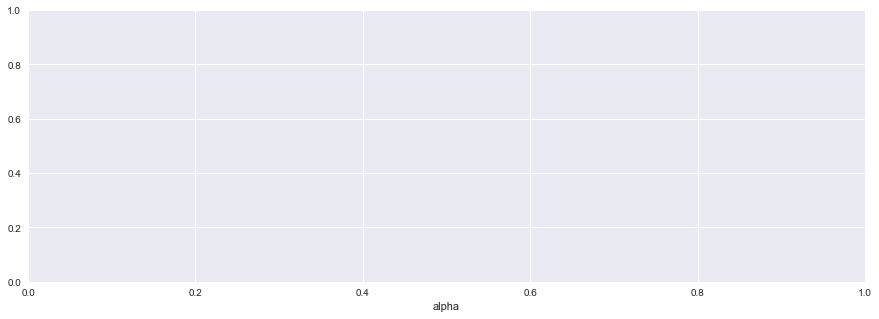

In [89]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.set_xlabel("alpha")
ay.set_ylabel("Recall")
ax.set_title("Recall vs. Alpha for Training and Testing Sets")
ax.plot(ccp_alphas, recall_train, marker = "o", label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, recall_test, marker = "o", label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()

In [90]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

ValueError: attempt to get argmax of an empty sequence

In [91]:
get_recall_score(best_model)

NameError: name 'best_model' is not defined

In [92]:
make_confusion_matrix(best_model, ytest)

NameError: name 'best_model' is not defined

In [93]:
plt.figure(figsize = (10, 10))

out = tree.plot_tree(best_model, feature_names = feature_names, filled = True, fontsize = 9, node_ids = True, class_names = True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

In [94]:
print(tree.export_text(best_model, feature_names = feature_names, show_weights = True))

AttributeError: module 'sklearn.tree' has no attribute 'export_text'

In [95]:
print(pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = xtrain.columns).sort_values(by = "Imp", ascending = False))

NameError: name 'best_model' is not defined

In [96]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

NameError: name 'best_model' is not defined

In [97]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[0.90,1,0.93], 'Test_Recall':[0.89,1,0.92]}) 
comparison_frame

,Model,Test_Recall,Train_Recall
0,Initial decision tree model,0.89,0.90
1,Decision treee with hyperparameter tuning,1.00,1.00
2,Decision tree with post-pruning,0.92,0.93
